# Matek Stat alapozás

Itt nézem meg 4 hatványeloszlás sűrűségfüggvényénekk integráltját. A Numpy-t használva készíten bineket és szorzom őket. A binben lévő értékekkel. 

In [16]:
import powerlaw as powerlaw
#próbáljuk meg ezt lerajzolni hisztogramon, ahogy az előbb
df=pd.DataFrame()
df["power_2"]=powerlaw.Power_Law(xmin=2, parameters=[2],discrete=True).generate_random(10000)
df["power_2_5"]=powerlaw.Power_Law(xmin=2, parameters=[2.5],discrete=True).generate_random(10000)
df["power_3"]=powerlaw.Power_Law(xmin=2, parameters=[3],discrete=True).generate_random(10000)
df["power_1_5"]=powerlaw.Power_Law(xmin=2, parameters=[1.5],discrete=True).generate_random(10000)

for power in ["power_2", "power_2_5", "power_3", "power_1_5"]:
    counts,bin_edges = np.histogram(df[power], bins=100)

    
    upper=counts*bin_edges[1:]
    lower=counts*bin_edges[0:-1]
    print(f"\033[1mEloszláts neve: {power}\033[0m")
    print(f"Várható érték: {df[power].mean()}")
    print(f"Szórás: {df[power].std()}")
    print(f"\033[92mNormalizációs konstant: {sum((upper+lower)/2)} \033[0m \n")

Eloszláts neve: power_2
Várható érték: 19.1713
Szórás: 353.37126493449273
Normalizációs konstant: 1586966.0600000003  

Eloszláts neve: power_2_5
Várható érték: 4.7454
Szórás: 13.30888768790038
Normalizációs konstant: 74325.24999999997  

Eloszláts neve: power_3
Várható érték: 3.4646
Szórás: 4.048010064037474
Normalizációs konstant: 37573.71000000001  

Eloszláts neve: power_1_5
Várható érték: 1332819.9284
Szórás: 122205435.93316196
Normalizációs konstant: 622880246436.5  



## Következik a konvergencia bemutatása 

Egy függvényt hívok meg, mely két argumentumot egy ranget és egy alfa paramétert vesz inputként. Ebből a kettőből kiszámolja a poisson és a binomiális eloszlásk közötti különbség legnagyobb értékét. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RANGE = range(10,300,1)
from supremum import calculate_diff_series # itt hívom meg a függvényemet. A calculate_diff_series két argumentummal rendelkezik
        
        
lam_1=calculate_diff_series(1, RANGE)
lam_3=calculate_diff_series(3, RANGE)
lam_5=calculate_diff_series(5, RANGE)

konvergencia=pd.DataFrame()
konvergencia["n"]=[i for i in RANGE]
konvergencia["lambda1"]=lam_1
konvergencia["lambda3"]=lam_3
konvergencia["lambda5"]=lam_5

In [6]:
konvergencia=konvergencia.fillna(method='ffill') #ez torzít az eloszláson, de kirajzolhatóvá teszi a konvergenciát
konvergencia['moving_avg_1'] = konvergencia.iloc[:,1].rolling(window=10).mean()
konvergencia['moving_avg_3'] = konvergencia.iloc[:,2].rolling(window=10).mean()
konvergencia['moving_avg_5'] = konvergencia.iloc[:,3].rolling(window=10).mean()

Text(0.5, 1.0, 'Konvergencia különböző lambdákra')

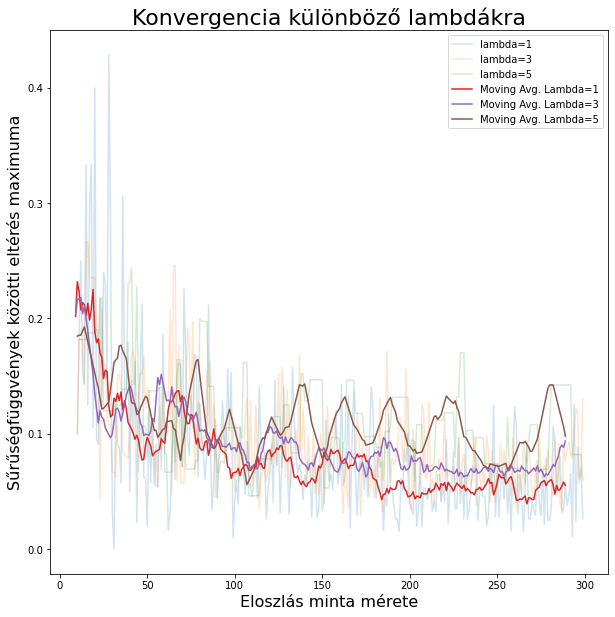

In [11]:
fig  = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.plot(konvergencia["n"], konvergencia["lambda1"], label="lambda=1", alpha=0.2) 
ax.plot(konvergencia["n"], konvergencia["lambda3"], label="lambda=3", alpha=0.2) 
ax.plot(konvergencia["n"], konvergencia["lambda5"], label="lambda=5", alpha=0.2) 

ax.plot(konvergencia['moving_avg_1'], label="Moving Avg. Lambda=1")
ax.plot(konvergencia['moving_avg_3'], label="Moving Avg. Lambda=3")
ax.plot(konvergencia['moving_avg_5'], label="Moving Avg. Lambda=5")


#konvergencia['moving_avg_3'] 
#konvergencia['moving_avg_5'] 

ax.set_xlabel('Eloszlás minta mérete', fontsize=16)
ax.set_ylabel('Sűrűségfüggvények közötti eltérés maximuma', fontsize=16)

ax.legend() # add legend

ax.set_title('Konvergencia különböző lambdákra', fontsize=22)

## Az alábbi megoldást egy CEUs órán tanultam

Ami érdekes benne, hogy csak numpyban array műveletekkel csinálunk normális eloszlást. Ezzel nagyon gyors lesz a kód.

In [18]:
import math
n = 1000

m = 10000

a = np.random.random([n,m])

clt_rand = (np.sum(a-0.5,axis=0))/(math.sqrt(n)*np.std(a,axis=0))

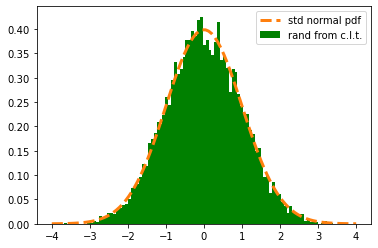

In [28]:
import matplotlib.pyplot as plt
plt.hist(clt_rand, density=True, bins=100, facecolor='g', alpha=1,label='rand from c.l.t.')
x = np.linspace(-4,4,100)
plt.plot(x,np.exp(-x**2/2)/(2*np.pi)**.5,'--',linewidth=3, label='std normal pdf')
plt.legend()